In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '~/Desktop/workspace/indeed/Job-Satisfaction/data'
df_eco = pd.read_csv(data_path+'/Fortune_1000/fortune50_info.csv')

df_eco.head()

,Rank,Company_Name,Employee_Number,Revenues(m),Revenues(pc),Profits,Profits(pc),Assets(m),Market_Value(m),Sector,Industry
0,1,Walmart,"2,200,000","$514,405.00",2.8%,"$6,670.00",-32.4%,"$219,295.00","$279,880.00",Retailing,General Merchandisers
1,2,Exxon Mobil,"71,000","$290,212.00",18.8%,"$20,840.00",5.7%,"$346,196.00","$342,172.00",Energy,Petroleum Refining
2,3,Apple,"132,000","$265,595.00",15.9%,"$59,531.00",23.1%,"$365,725.00","$895,667.00",Technology,"Computers, Office Equipment"
3,4,Berkshire Hathaway,"389,000","$247,837.00",2.4%,"$4,021.00",-91.1%,"$707,794.00","$493,870.00",Financials,Insurance: Property and Casualty (Stock)
4,5,Amazon.com,"647,500","$232,887.00",30.9%,"$10,073.00",232.1%,"$162,648.00","$874,710.00",Retailing,Internet Services and Retailing


In [21]:
df_eco.groupby('Sector')['Sector'].count()

Sector
Aerospace & Defense           4
Chemicals                     2
Energy                       10
Financials                   19
Food & Drug Stores            4
Food, Beverages & Tobacco     4
Health Care                  14
Household Products            2
Industrials                   2
Motor Vehicles & Parts        4
Retailing                    12
Technology                   12
Telecommunications            6
Transportation                4
Name: Sector, dtype: int64

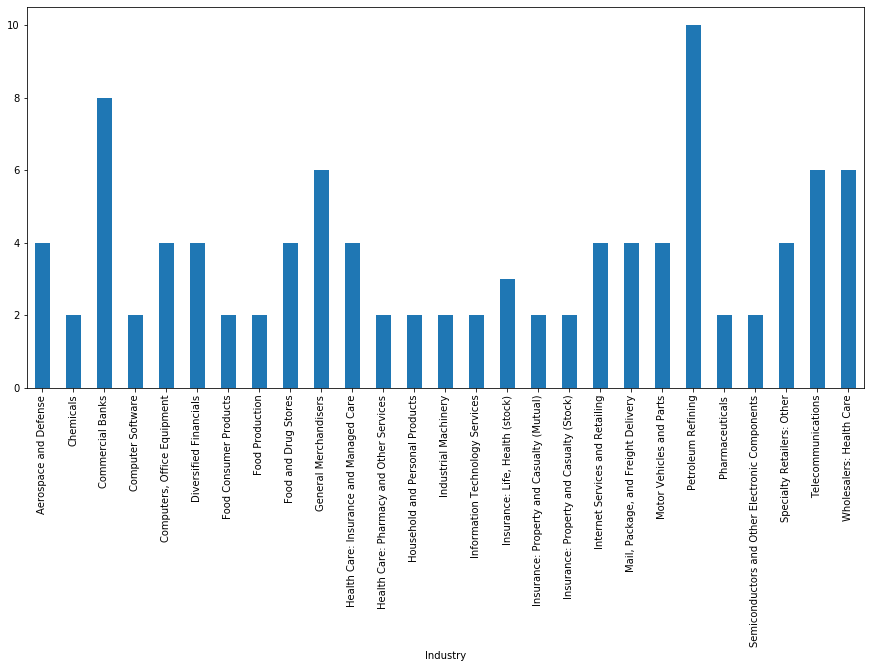

In [3]:
fig, ax = plt.subplots(figsize=(15, 7))
df_eco.groupby('Industry')['Industry'].count().plot.bar(ax=ax)

In [4]:
def merge_data(company_list=range(1,51), sector="Technology"):
    df_ = pd.DataFrame()
    df_company_list = pd.read_csv( '~/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/indeed_site50.csv')
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        data_path = '~/Desktop/workspace/indeed/Job-Satisfaction/data/companies/'+\
                    f'{company_index}_{company_name}/{company_name}.csv'
        df_company = pd.read_csv(data_path)
        if(df_eco.iloc[company_index-1]['Sector'] == sector):
            print(company_name)
            df_ = pd.concat([df_, pd.read_csv(data_path)]).reset_index(drop=True)
    return df_

df = merge_data()

Apple
Google
Microsoft
Dell-Technologies
IBM
Intel


In [6]:
def merge_data(company_list=range(1,51), reviewed_year=[2018, 2019]):
    df_ = pd.DataFrame()
    cols_rate = ['Rating_Number', 'Work_Life', 'Benefits',\
                'Job_Advancement', 'Management', 'Culture']
    cols_eco = df_eco.columns.tolist()

    cols_eco.extend(cols_rate)
    paras_list = []
    df_company_list = pd.read_csv( \
    '~/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/indeed_site50.csv')
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]\
        ['Company_Name']
        data_path = '~/Desktop/workspace/indeed/Job-Satisfaction/data/companies/'+\
                    f'{company_index}_{company_name}/{company_name}.csv'
        df_company = pd.read_csv(data_path)
        df_company = df_company[df_company.Reviewed_Year.\
                                isin(reviewed_year)]
#         print(df_company.head())
        df_company = df_company[['Rating_Number', 'Work_Life',\
                                'Benefits', 'Job_Advancement',\
                                'Management', 'Culture']]
        paras = df_company.mean(axis=0).round(4).to_list()
        eco = df_eco.iloc[company_index-1].to_list()
        eco.extend(paras)
        paras_list.append(eco)
    df_ = pd.DataFrame(paras_list, columns=cols_eco)
    return df_

df = merge_data()
df.head()


,Rank,Company_Name,Employee_Number,Revenues(m),Revenues(pc),Profits,Profits(pc),Assets(m),Market_Value(m),Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1,Walmart,"2,200,000","$514,405.00",2.8%,"$6,670.00",-32.4%,"$219,295.00","$279,880.00",Retailing,General Merchandisers,3.5108,3.0775,3.0648,2.9769,2.8132,3.0505
1,2,Exxon Mobil,"71,000","$290,212.00",18.8%,"$20,840.00",5.7%,"$346,196.00","$342,172.00",Energy,Petroleum Refining,3.8919,3.3543,3.1845,3.0363,3.2356,3.2715
2,3,Apple,"132,000","$265,595.00",15.9%,"$59,531.00",23.1%,"$365,725.00","$895,667.00",Technology,"Computers, Office Equipment",4.1606,3.4843,3.7607,3.3799,3.3930,3.7888
3,4,Berkshire Hathaway,"389,000","$247,837.00",2.4%,"$4,021.00",-91.1%,"$707,794.00","$493,870.00",Financials,Insurance: Property and Casualty (Stock),4.1797,3.6250,3.5078,3.2969,3.6094,3.6875
4,5,Amazon.com,"647,500","$232,887.00",30.9%,"$10,073.00",232.1%,"$162,648.00","$874,710.00",Retailing,Internet Services and Retailing,3.5722,3.0818,3.5092,2.9642,2.9719,3.1593


In [7]:
df.rename(columns={"Revenues(m)":"Revenues", "Assets(m)":"Assets",
                  "Market_Value(m)":"Market_Value"}, inplace=True)
df.dtypes

Rank                 int64
Company_Name        object
Employee_Number     object
Revenues            object
Revenues(pc)        object
Profits             object
Profits(pc)         object
Assets              object
Market_Value        object
Sector              object
Industry            object
Rating_Number      float64
Work_Life          float64
Benefits           float64
Job_Advancement    float64
Management         float64
Culture            float64
dtype: object

In [8]:
df['Employee_Number'] = df['Employee_Number'].str.replace('\$|,', "")
df['Revenues'] = df['Revenues'].str.replace('\$|,', "").str[:-3]
df['Profits'] = df['Profits'].str.replace('\$|,', "").str[:-3]
df['Assets'] = df['Assets'].str.replace('\$|,', "").str[:-3]
df['Market_Value'] = df['Market_Value'].str.replace('\$|,', "").str[:-3]


df.head()


,Rank,Company_Name,Employee_Number,Revenues,Revenues(pc),Profits,Profits(pc),Assets,Market_Value,Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,3.5108,3.0775,3.0648,2.9769,2.8132,3.0505
1,2,Exxon Mobil,71000,290212,18.8%,20840,5.7%,346196,342172,Energy,Petroleum Refining,3.8919,3.3543,3.1845,3.0363,3.2356,3.2715
2,3,Apple,132000,265595,15.9%,59531,23.1%,365725,895667,Technology,"Computers, Office Equipment",4.1606,3.4843,3.7607,3.3799,3.3930,3.7888
3,4,Berkshire Hathaway,389000,247837,2.4%,4021,-91.1%,707794,493870,Financials,Insurance: Property and Casualty (Stock),4.1797,3.6250,3.5078,3.2969,3.6094,3.6875
4,5,Amazon.com,647500,232887,30.9%,10073,232.1%,162648,874710,Retailing,Internet Services and Retailing,3.5722,3.0818,3.5092,2.9642,2.9719,3.1593


In [9]:
df['Employee_Number'] = df['Employee_Number'].replace('', np.nan)
df['Revenues'] = df['Revenues'].replace('', np.nan)
df['Profits'] = df['Profits'].replace('', np.nan)
df['Assets'] = df['Assets'].replace('', np.nan)
df['Market_Value'] = df['Market_Value'].replace('', np.nan)

In [10]:
df.shape

(50, 17)

In [11]:
df.to_csv('~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/lr_company_revenue_unnormalized.csv')

In [12]:
df1 = df.copy()

In [13]:
df['Employee_Number'] = df['Employee_Number'].astype(np.float)
df['Revenues'] = df['Revenues'].astype(np.float)/df['Employee_Number']
df['Profits'] = df['Profits'].astype(np.float)/df['Employee_Number']
df['Assets'] = df['Assets'].astype(np.float)/df['Employee_Number']
df['Market_Value'] = df['Market_Value'].astype(np.float)/df['Employee_Number']

df.head()

,Rank,Company_Name,Employee_Number,Revenues,Revenues(pc),Profits,Profits(pc),Assets,Market_Value,Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1,Walmart,2200000.0,0.233820,2.8%,0.003032,-32.4%,0.099680,0.127218,Retailing,General Merchandisers,3.5108,3.0775,3.0648,2.9769,2.8132,3.0505
1,2,Exxon Mobil,71000.0,4.087493,18.8%,0.293521,5.7%,4.876000,4.819324,Energy,Petroleum Refining,3.8919,3.3543,3.1845,3.0363,3.2356,3.2715
2,3,Apple,132000.0,2.012083,15.9%,0.450992,23.1%,2.770644,6.785356,Technology,"Computers, Office Equipment",4.1606,3.4843,3.7607,3.3799,3.3930,3.7888
3,4,Berkshire Hathaway,389000.0,0.637113,2.4%,0.010337,-91.1%,1.819522,1.269589,Financials,Insurance: Property and Casualty (Stock),4.1797,3.6250,3.5078,3.2969,3.6094,3.6875
4,5,Amazon.com,647500.0,0.359671,30.9%,0.015557,232.1%,0.251194,1.350903,Retailing,Internet Services and Retailing,3.5722,3.0818,3.5092,2.9642,2.9719,3.1593


In [16]:
# df.shape
df.to_csv('~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/lr_company_revenue_normalized.csv')

In [18]:
df.dropna(inplace=True)
df.shape

(49, 17)

In [139]:
df = df[['Employee_Number', 'Revenues', 'Profits', 'Assets', \
         'Market_Value', 'Rating_Number', 'Work_Life', 'Benefits', \
        'Job_Advancement', 'Management', 'Culture']]

print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(49, 11)
(49, 11)


In [141]:
import statsmodels.formula.api as sm

result = sm.ols(formula="Rating_Number ~ Work_Life + Benefits +\
Job_Advancement + Management + Culture + Profits+\
Assets+Market_Value+Revenues", 
data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Rating_Number   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           4.05e-26
Time:                        14:42:48   Log-Likelihood:                 81.201
No. Observations:                  49   AIC:                            -142.4
Df Residuals:                      39   BIC:                            -123.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0385      0.146     

In [142]:
import statsmodels.formula.api as sm

result = sm.ols(formula="Rating_Number ~ Employee_Number + Profits+\
Assets+Market_Value+Revenues", 
data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Rating_Number   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     6.846
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           8.91e-05
Time:                        14:42:57   Log-Likelihood:                 11.772
No. Observations:                  49   AIC:                            -11.54
Df Residuals:                      43   BIC:                           -0.1925
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6428      0.050     

<function matplotlib.pyplot.show(*args, **kw)>

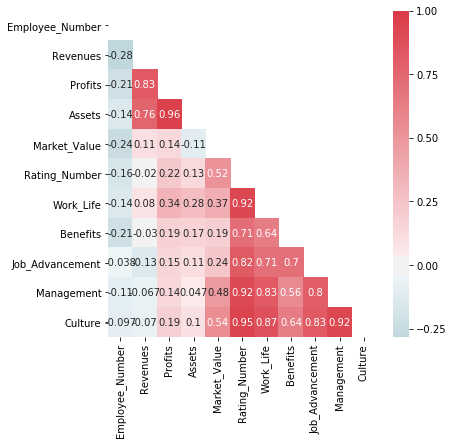

In [143]:
import seaborn as sns

# sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0.0)
plt.show